In [1]:
from tqdm.notebook import tqdm
import numpy as np
from numpy import log, exp, sqrt
import matplotlib.pyplot as plt

import torch

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
from src.util import (
    generate_heston_paths, 
    generate_gbm_paths,
    get_mc_price
)

from src.model import Environment, Agent

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode 1/10000: Total Reward = 0.00, Loss = 0.6811, Eps = 0.9850
Episode 51/10000: Total Reward = 2.22, Loss = 0.8113, Eps = 0.7667
Episode 101/10000: Total Reward = 1.10, Loss = 0.0000, Eps = 0.5967
Episode 151/10000: Total Reward = 0.00, Loss = 0.0000, Eps = 0.4644
Episode 201/10000: Total Reward = 0.00, Loss = 0.0000, Eps = 0.3615
Episode 251/10000: Total Reward = 7.42, Loss = 0.0000, Eps = 0.2813
Episode 301/10000: Total Reward = 2.70, Loss = 1.4814, Eps = 0.2190
Episode 351/10000: Total Reward = 0.00, Loss = 0.0000, Eps = 0.1704
Episode 401/10000: Total Reward = 0.70, Loss = 0.9852, Eps = 0.1326
Episode 451/10000: Total Reward = 0.00, Loss = 4.9434, Eps = 0.1032
Episode 501/10000: Total Reward = 0.00, Loss = 0.0000, Eps = 0.0804
Episode 551/10000: Total Reward = 0.00, Loss = 10.1815, Eps = 0.0625
Episode 601/10000: Total Reward = 4.40, Loss = 0.0000, Eps = 0.0487
Episode 651/10000: Total Reward = 0.88, Loss = 0.0000, Eps = 0.0379
Episode 701/10000: Total Reward = 0.00, Loss = 0.0

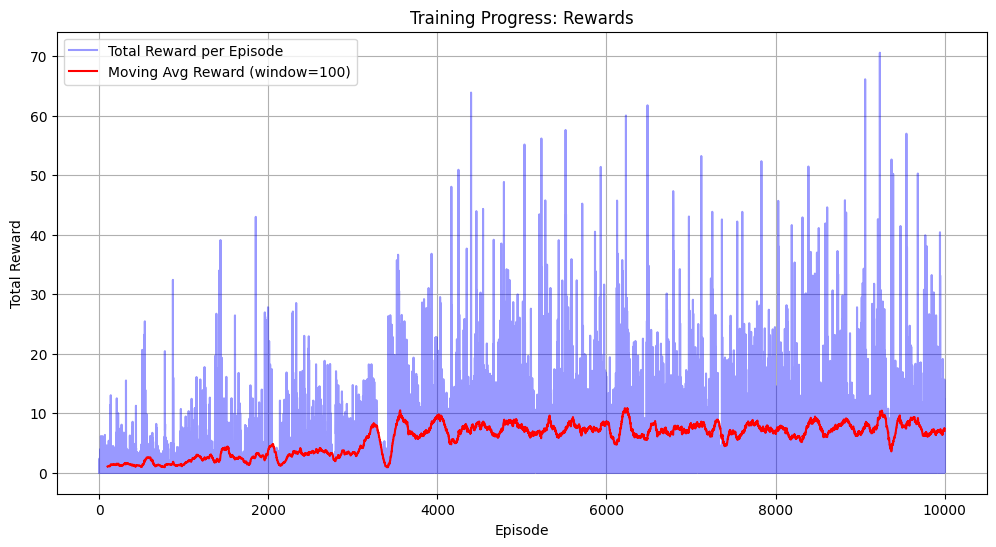

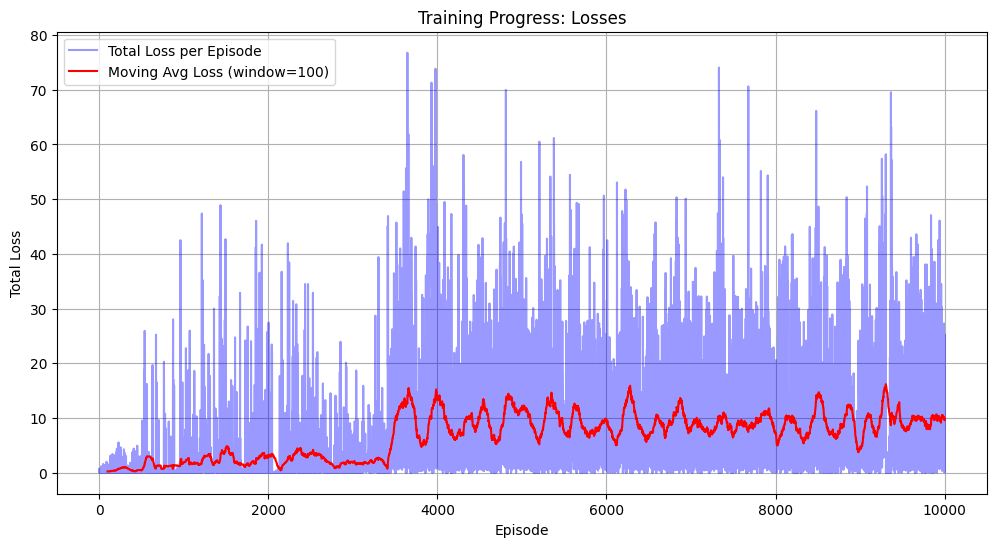

In [2]:
call = lambda x, k: np.maximum(x-k, 0)
put  = lambda x, k: np.maximum(k-x, 0)

nsim = 10000; nstep = 365
t1 = 0; t2 = 1
s_0 = 100; r = 0.04; q = 0.00
path_kwargs = dict(v=0.40)
k = 100

env = Environment(
    nsim=nsim, nstep=nstep, t1=t1, t2=t2, s_0=s_0, r=r, q=q,
    path_kwargs=path_kwargs, h=put, k=k, gbm=True
)

agent = Agent(
    env=env, hidden_dim=128, depth=3, lr=0.001, buffer_size=10000, batch_size=64,
    buffer_interval=8, model_interval=50, gamma=0.99, eps=0.99, eps_decay=0.995, eps_min=0.01
)

losses, rewards = agent.train(nepisode=10000, notebook=True)

In [3]:
get_mc_price(prices=env.prices, t1=t1, t2=t2, h=put, k=k, r=r)

13.67157047407409

In [4]:
agent.eval(nepisode=1000)

6.810835035385513

Sandbox

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# ax[0].plot(losses); ax[1].plot(rewards)
# plt.tight_layout()

# seed = 1
# rng = np.random.default_rng(seed=seed)

# prices = generate_gbm_paths(rng=rng, nsim=nsim, nstep=nstep, t1=t1, t2=t2, s_0=s_0, r=r, q=q, v=v)

# get_mc_price(prices=prices, t1=t1, t2=t2, h=put, k=k, r=r)